In [0]:
import pickle
import re
import operator
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import math
import collections
import gensim

In [2]:

dataset = pickle.load(open('AIML_DS_NEWSGROUPS_PICKELFILE.pkl','rb'))
print(dataset.keys())

# Print frequencies of dataset
print("Class : count")
print("--------------")
number_of_documents = 0
for key in dataset:
    print(key, ':', len(dataset[key]))

dict_keys(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc'])
Class : count
--------------
talk.politics.mideast : 940
rec.autos : 990
comp.sys.mac.hardware : 961
alt.atheism : 799
rec.sport.baseball : 994
comp.os.ms-windows.misc : 985
rec.sport.hockey : 999
sci.crypt : 991
sci.med : 990
talk.politics.misc : 775
rec.motorcycles : 994
comp.windows.x : 980
comp.graphics : 973
comp.sys.ibm.pc.hardware : 982
sci.electronics : 981
talk.politics.guns : 910
sci.space : 987
soc.religion.christian : 997
misc.forsale : 972
talk.religion.misc : 628


95 : 5 train test split

In [0]:
train_set = {}
test_set = {}
new_dataset = {}

for key in dataset:
    new_dataset[key] = [[i.decode('cp1252').lower() for i in f] for f in dataset[key]]

n_train = 0
n_test = 0
for k in new_dataset:
    split = int(0.95*len(new_dataset[k]))
    train_set[k] = new_dataset[k][0:split]
    test_set[k] = new_dataset[k][split:]
    n_train += len(train_set[k])
    n_test += len(test_set[k])

In [4]:
frequency = defaultdict(int)
    
for key in train_set:
    for f in train_set[key]:
        words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', ' '.join(f))

        for word in words:
            frequency[word] += 1

sorted_words = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)
print("Top-10 most frequent words:")
for word in sorted_words[:10]:
    print(word)

print('----------------------------')
print("10 least frequent words:")
for word in sorted_words[-10:]:
    print(word)

Top-10 most frequent words:
('the', 226859)
('and', 90621)
('that', 62088)
('for', 43546)
('you', 42430)
('from', 35358)
('this', 31001)
('not', 28645)
('have', 28519)
('are', 28355)
----------------------------
10 least frequent words:
('apokteiuo', 1)
('odessy', 1)
('reedited', 1)
('stumps', 1)
('morsel', 1)
('roston', 1)
('nutball', 1)
('tillage', 1)
('honorably', 1)
('beecher', 1)


In [5]:
valid_words = defaultdict(int)

print('Number of words before preprocessing:', len(sorted_words))

# Ignore the 25 most frequent words, and the words which appear less than 100 times
ignore_most_frequent = 25
freq_thresh = 100
feature_number = 0
for word, word_frequency in sorted_words[ignore_most_frequent:]:
    if word_frequency > freq_thresh:
        valid_words[word] = feature_number
        feature_number += 1
        
print('Number of words after preprocessing:', len(valid_words))

word_vector_size = len(valid_words)

Number of words before preprocessing: 89587
Number of words after preprocessing: 4096


Word2Vec, visualization

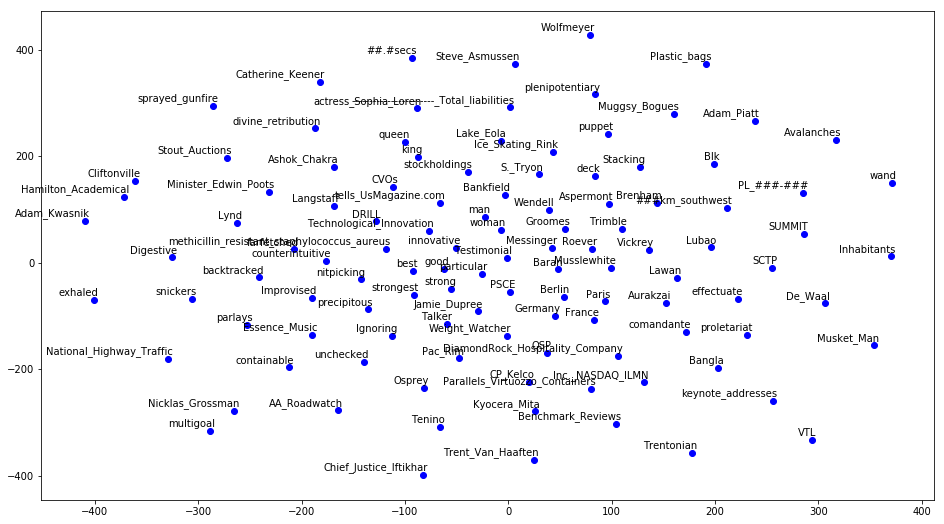

In [7]:
def plot_values(values, labels, figsize = (8,4), c = []):
    x = []
    y = []
    for value in values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=figsize) 
    for i in range(len(labels)):
        plt.scatter(x[i],y[i], color=c[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()


import pickle
two_dim_model = pickle.load(open('AIML_DS_WORD2VEC2D_STD.pkl', 'rb'))

wv_labels = {}
for vec, word in two_dim_model:
    wv_labels[word] = vec
    
colors = ['blue' for i in range(len(wv_labels))]

plot_values(wv_labels.values(), list(wv_labels.keys()), figsize = (16, 9), c = colors)

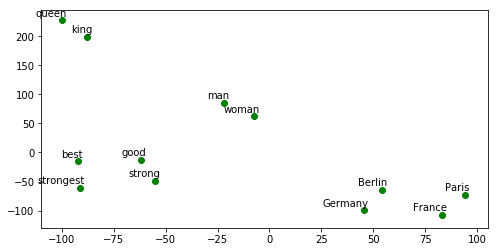

In [8]:
wv_list = ['king', 'queen', 'man', 'woman', 'Germany', 'France', 'Berlin', 'Paris', 'best', 'good', 'strong', 'strongest']
wv_new_labels = {}
for word in wv_list:
    wv_new_labels[word] = wv_labels[word]

colors = ['green' for i in range(len(wv_new_labels))]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)

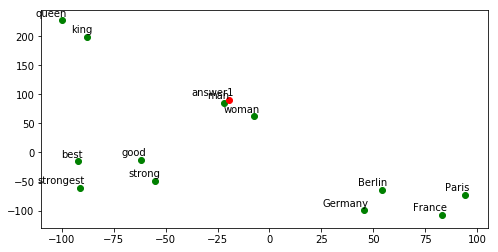

In [9]:
answer = wv_new_labels['woman']  + wv_new_labels['queen'] - wv_new_labels['king']

wv_new_labels['answer1'] = answer

colors = ['green' if word not in ['answer1'] else 'red' for word in wv_new_labels]

plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)

Load pretrained model

In [10]:
model = gensim.models.KeyedVectors.load_word2vec_format('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin', binary=True, limit=500000)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
word2vec_vector_size = 300
def convert_to_w2v(dataset, number_of_documents, substitute_word_vecs={}):
    # word2vec representation (within 'w2v_rep' array) and labels within the 'labels' array
    # returns "substitute_word_vecs" as a random Gaussian vector value. Consider using :  np.random.normal(-0.25, 0.25, word2vec_vector_size)
    labels = np.zeros((number_of_documents, 1))
    w2v_rep = np.zeros((number_of_documents, word2vec_vector_size))
    
    emails = [email for email_list in [dataset[key] for key in dataset] for email in email_list]
    len(emails)
    i = 0
    count = []
    for key in dataset:
      count.append(len(dataset[key]))
      if i > 0:
        count[i] += count[i-1]
      i += 1
    
    i = 0
    k = 0
    for sentences in emails:
      valid_count = 1
      for word in ' '.join(sentences).split(' '):
        if word in valid_words:
          try:
            w2v_rep[i] += model[word]
          except KeyError:
            if word not in substitute_word_vecs.keys():
              substitute_word_vecs[word] = np.random.normal(-0.25, 0.25, word2vec_vector_size)
            w2v_rep[i] += substitute_word_vecs[word]
          valid_count += 1
      # Average
      w2v_rep[i] = w2v_rep[i] / valid_count
      # Save label
      if count[k] < i:
        k += 1
      labels[i] = k #labelling using carrying sum of counts, as it was lost in list comprehension
      i += 1
    print(i, len(substitute_word_vecs.keys()), w2v_rep.shape, len(labels))
    return w2v_rep, labels, substitute_word_vecs

# Convert the train and test datasets into their word2vec representations
train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v(train_set, n_train)
test_w2v_set, test_w2v_labels,_ = convert_to_w2v(test_set, n_test, substitute_word_vecs)

17878 349 (17878, 300) 17878
950 350 (950, 300) 950


Bag of Words

In [0]:
def convert_to_BoW(dataset, number_of_documents):
    bow_representation = np.zeros((number_of_documents, word_vector_size))
    labels = np.zeros((number_of_documents, 1))
    
    i = 0
    for label, class_name in enumerate(dataset):
        
        # For each file
        for f in dataset[class_name]:
            
           # end-to-end BOW representation
          text = ' '.join(f).split(' ')
          for word in text:
              if word in valid_words:
                  bow_representation[i, valid_words[word]] += 1
          labels[i] = label
          i += 1
    
    return bow_representation, labels

# Convert the dataset into their bag of words representation treating train and test separately
train_bow_set, train_bow_labels = convert_to_BoW(train_set, n_train)
test_bow_set, test_bow_labels = convert_to_BoW(test_set, n_test)

Performance Metrics after classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_w2v_set, train_w2v_labels)
pred = model.predict(test_w2v_set)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(test_w2v_labels,pred)

0.6336842105263157

In [15]:
from sklearn.metrics import precision_score
precision_score(test_w2v_labels, pred,average='macro')

0.6539011691973118

In [16]:
from sklearn.metrics import recall_score
recall_score(test_w2v_labels, pred,average='macro')

0.6303246758083965

In [17]:
from sklearn.metrics import classification_report
print(classification_report(test_w2v_labels,pred))

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.73        48
         1.0       0.53      0.82      0.65        50
         2.0       0.60      0.78      0.68        49
         3.0       0.49      0.72      0.59        40
         4.0       0.70      0.86      0.77        50
         5.0       0.47      0.54      0.50        50
         6.0       0.80      0.86      0.83        50
         7.0       0.51      0.82      0.63        50
         8.0       0.72      0.66      0.69        50
         9.0       0.51      0.62      0.56        39
        10.0       0.77      0.46      0.57        50
        11.0       0.59      0.53      0.56        49
        12.0       0.57      0.47      0.52        49
        13.0       0.69      0.48      0.56        50
        14.0       0.91      0.62      0.74        50
        15.0       0.76      0.83      0.79        46
        16.0       0.94      0.66      0.78        50
        17.0       0.66    

In [0]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
matW2V = confusion_matrix(test_w2v_labels, pred)

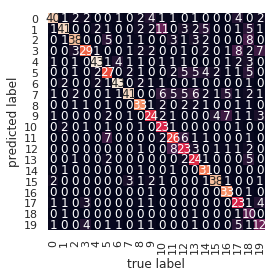

In [19]:
dist_labelsW2V=np.asarray(list(set(test_w2v_labels.flatten().astype(int))))
sns.heatmap(matW2V.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dist_labelsW2V,
            yticklabels=dist_labelsW2V)
plt.xlabel('true label')
plt.ylabel('predicted label');